 


# <center>LinkedIn_job_data_Analysis</center>
<img src = "https://storage.googleapis.com/kaggle-datasets-images/3505006/6115777/3994e5d4618af4f104c46abb7ad1b674/dataset-cover.png?t=2023-07-11-06-34-15" width = "550" title = "Cover" />



The LinkedIn data set provided contains 5,588 rows and 15 columns, providing a comprehensive overview of job postings on the platform. The data can be used for data analysis, visualization, and research. The job postings include Data Analyst, Machine Learning Engineer, IT Services, and IT Consulting roles, located in various locations around the world, with varying salaries and work hours. The data set includes information about the company, role responsibilities, and required skills for each job. This data set is a valuable resource for understanding job opportunities in different industries and locations.


### These  are the following  Libraries used in the Project :
* Matplotlib  <a href='https://matplotlib.org/'> Explore here </a>
* Seaborn  <a href='https://seaborn.pydata.org/'> Explore here </a>
* Numpy  <a href='https://numpy.org/'> Explore here </a>
* Pandas  <a href='https://pandas.pydata.org/'> Explore here </a>
* Jovian  <a href='https://jovian.ml'> Explore here </a>





* <font size = "3"><strong> Link to the Dataset used - <a href = 'https://www.kaggle.com/datasets/shashankshukla123123/linkedin-job-cleandata'> Source </a> </strong> </font>
<br>


Let's import jovian

In [1]:
import jovian

## Downloading the Data-set


let's download the dataset from kaggale

In [2]:
!pip install jovian opendatasets --upgrade --quiet

In [3]:
dataset_link = 'https://www.kaggle.com/datasets/shashankshukla123123/linkedin-job-cleandata'

let's import opendatasets to download the the requried dataset

In [5]:
import opendatasets as od
od.download(dataset_link,force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: samkumarr
Your Kaggle Key: ········


100%|██████████| 3.42M/3.42M [00:01<00:00, 1.86MB/s]


In [6]:
data_dir = './linkedin-job-cleandata'

**Let's import os module to list our dataset in the directory**

In [7]:
import os
os.listdir(data_dir)

['job_cleanData.csv']

In [12]:
project_name = "Linkedin_job_Analysis"

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

In [145]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "samkumarr24/linkedin-job-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/samkumarr24/linkedin-job-analysis


'https://jovian.com/samkumarr24/linkedin-job-analysis'

###### let's install pandas dataframe 

Pandas is a powerful open-source library in Python used for data manipulation and analysis. It provides data structures like DataFrame and Series, which allow users to efficiently handle and process structured data. With its intuitive and flexible functionalities, Pandas simplifies tasks such as data cleaning, transformation, and aggregation, making it an essential tool for data scientists, analysts, and engineers in various fields.

In [13]:
import pandas as pd

In [14]:
# we can bring the data using the pd.read_csv

linkdin_data = pd.read_csv('./linkedin-job-cleandata/job_cleanData.csv')


## Data Preparing and  cleaning 

let's clean our data and perpare our data for analysis

**lets convert the linkdin followers into int type , so we can use .astype(int) to convert 
the folat values into numeric(int) values**

In [15]:
linkdin_data['linkedin_followers'] = linkdin_data['linkedin_followers'].astype('int')
# lets convert the linkdin followers into numeric values

In [16]:
linkdin_data.head()

,job_ID,designation,company_id,name,work_type,involvement,employees_count,total_applicants,linkedin_followers,job_details,details_id,industry,level,City,State
0,3471657636,Data Analyst,524.0,Crossover,Remote,Full-time,1001,200,5395547,About the job Crossover is the world's #1 sour...,2697,IT Services and IT Consulting,Associate,Delhi,Delhi
1,3471669068,Data Analyst,524.0,Crossover,Remote,Full-time,1001,184,5395547,About the job Crossover is the world's #1 sour...,2724,IT Services and IT Consulting,Associate,New Delhi,Delhi
2,3474349934,Data Analyst,2242.0,Uplers,Remote,Full-time,1001,200,982115,About the job Profile: ML EngineersExperience:...,3668,IT Services and IT Consulting,Mid-Senior level,Greater Bengaluru Area,Karnataka
3,3472816027,Data Analyst,1553.0,PVAR SERVICES,On-site,Full-time,1,200,2094,About the job Designation: Data AnalystLocatio...,3083,Not Avilable,Not Avilable,Gurugram,Haryana
4,3473311511,Data Analyst,2147.0,Timeline Freight Brokers,On-site,Full-time,1,8,982115,About the job The ideal candidate will use the...,3359,Not Avilable,Not Avilable,Mohali district,North West


lest's check is there any null values and na values

In [17]:
print(linkdin_data.isna().sum().any())
print(linkdin_data.isnull().sum().any())


False
False


let's see is there any duplicates by using the job id column as an primary key 

In [18]:
linkdin_data.nunique().any()

True

##### now lets look at the  Columns

In [19]:
for i in linkdin_data.columns:
    print(i)

job_ID
designation
company_id
name
work_type
involvement
employees_count
total_applicants
linkedin_followers
job_details
details_id
industry
level
City
State


now let's remove some of the cloumns {company_id , job_details , details_id} which are not quite necessary for this data

In [20]:
linkdin_data = linkdin_data.drop(['company_id', 'job_details', 'details_id'], axis=1)
#take out the unnecessary columns

since some of the name which have lower case and upper case lets convert that in sentence case which can be easy to read using the pd.title in pandas to do this operation 

In [21]:
#using the function to do the operation
def convert_name(n):
    n = n['name'].strip()
    #strip the data 
    n = n.title()
    #converts the name in the title case
    return n

linkdin_data['name'] = linkdin_data.apply(convert_name,axis=1)
    

In [22]:
#we can use the pd.sample method to look at the random sample data in the data_frame
linkdin_data.sample(5)

,job_ID,designation,name,work_type,involvement,employees_count,total_applicants,linkedin_followers,industry,level,City,State
4976,3474479509,Business Analyst,Bosleo,On-site,Full-time,51,31,18293,Not Avilable,Not Avilable,Surat,Gujarat
430,3469519951,Other,Essenware Private Limited,On-site,Contract,51,0,42950,Information Technology & Services,Not Avilable,Bangalore Urban,Karnataka
1048,3472881625,Node Js Developer,Career Fair Services & Technology,On-site,Full-time,11,0,4540,Not Avilable,Not Avilable,Ahmedabad,Gujarat
5129,3465296236,Consultant,Syndigo,Remote,Full-time,1001,200,982115,Software Development,Mid-Senior level,Greater Bengaluru Area,Karnataka
892,3474333527,Other Developer,Applicantz,Hybrid,Contract,51,0,331970,Technology Information and Internet,Mid-Senior level,Greater Bengaluru Area,Karnataka


lest's convert the name into company_name so it gives us more clarity on it so we can use the (pd.replace) function in pandas to do this type of the operation 

In [23]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "samkumarr24/linkedin-job-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/samkumarr24/linkedin-job-analysis


'https://jovian.com/samkumarr24/linkedin-job-analysis'

Let's rename the columns

In [24]:

linkdin_data.rename(columns={'name':'Company_name','total_applicants':'Applicants',
                             'linkedin_followers':'Followers'},inplace=True)
#renames the columns 


linkdin_data.rename(columns={col: col.title() for col in linkdin_data.columns}, inplace=True)
#converts all the coloumns in proper title case



since may values contains ('Not available') we can replace that with (other) in columns such as (Industry , Level, city),and states which north west and other so let's replace it
we can achive this by using the (pd.replace) function 

In [25]:
linkdin_data['Industry'].replace(to_replace='Not Avilable',value='Other',inplace=True)
linkdin_data['Level'].replace(to_replace='Not Avilable',value='Other',inplace=True)
linkdin_data['City'].replace(to_replace='[]',value='Other_cities',inplace=True)
linkdin_data['State'].replace(to_replace='North West',value='Other',inplace=True)

Since the state contains "India","Other" which are invalid so let's remove the data containing it 

In [26]:
linkdin_data = linkdin_data[~linkdin_data['State'].str.contains('India|Other|North West', case=False)]

In [27]:
linkdin_data.State.unique()

array(['Delhi', 'Karnataka', 'Haryana', 'Uttar Pradesh', 'Telangana',
       'Tamil Nadu', 'West Bengal', 'Maharashtra', 'Kerala', 'Gujarat',
       'Madhya Pradesh', 'Rajasthan', 'Chandigarh', 'Uttarakhand',
       'Punjab', 'Bihar', 'Andhra Pradesh', 'Puducherry', 'Goa', 'Odisha',
       'Jharkhand', 'Jammu and Kashmir', 'Himachal Pradesh', 'Assam',
       'Chhattisgarh'], dtype=object)

### Cleaned data

In [28]:
linkdin_data.sample(5)

,Job_Id,Designation,Company_Name,Work_Type,Involvement,Employees_Count,Applicants,Followers,Industry,Level,City,State
5323,3469556452,Technology Architecture,Hexaware Technologies,Hybrid,Full-time,10001,0,745415,IT Services and IT Consulting,Other,Pune,Maharashtra
723,3467382518,Database Developer,Nseit Limited,Hybrid,Full-time,1001,0,982115,IT Services and IT Consulting,Associate,Bengaluru,Karnataka
2439,3476181737,ReactJS Developer,Epam Anywhere,Remote,Full-time,1001,0,982115,IT Services and IT Consulting,Mid-Senior level,Kanpur,Uttar Pradesh
4319,3476236020,Editor,Jain Irrigation Systems Ltd.,On-site,Full-time,10001,24,32677,Other,Other,Jalgaon,Maharashtra
603,3184377229,Business Analyst,Mtx Group,Remote,Full-time,1001,0,982115,Information Technology & Services,Mid-Senior level,Bengaluru,Karnataka


In [29]:
linkdin_data.describe()

,Job_Id,Employees_Count,Applicants,Followers
count,5.572000e+03,5572.000000,5572.000000,5.572000e+03
mean,3.467245e+09,2122.003230,24.189340,9.849170e+05
std,6.191779e+07,3514.415432,52.817884,2.235210e+06
min,1.419216e+08,1.000000,0.000000,3.000000e+00
25%,3.467374e+09,51.000000,0.000000,1.814600e+04
50%,3.472556e+09,1001.000000,0.000000,4.501680e+05
75%,3.476290e+09,1001.000000,16.000000,9.821150e+05
max,3.477823e+09,10001.000000,200.000000,1.313679e+07


In [146]:
linkdin_data.shape

(5572, 12)

**The Data contains 5572 rows and columns**

### Now since we have cleaned our data and also shaped it now let's start exploring the data and bring out some intresting insights from the linkdin data

### Exploratory data Analysis and Visualization

let's install the necessary liabraries requried

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

%matplotlib inline

sns.set_style('darkgrid')

### State
let's look at which state which has higher number of respondents and we can pick the top 10 states For this we can use the (pd.value counts) and plots to visualize the data 

In [32]:
state_data = linkdin_data.groupby('State')[['Applicants']].sum()
state_data = state_data.sort_values('Applicants',ascending=False).head(10)
#there are totally 27 states in the data so we can pick the top 10 from it

state_data

,Applicants
State,
Karnataka,54476
Maharashtra,21256
Telangana,12511
Haryana,12221
Delhi,11247
Tamil Nadu,10029
Uttar Pradesh,6923
Gujarat,1788
Kerala,1165


visualize the data 

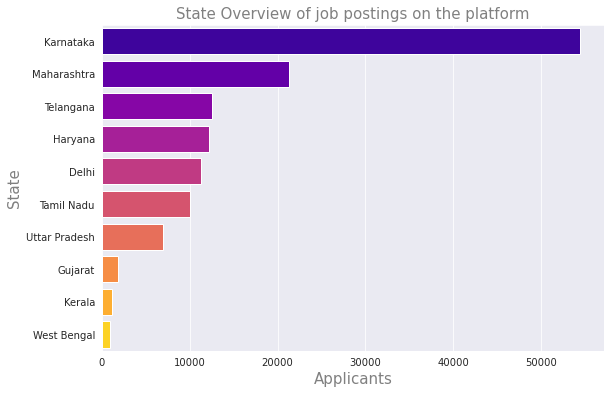

In [33]:
plt.figure(figsize=(9,6))
plt.xlabel('',fontsize=15, color='grey')
plt.ylabel('State',fontsize=15, color='grey')
plt.title('State Overview of job postings on the platform',fontsize=15, color='grey')
sns.barplot(x=state_data.Applicants,y=state_data.index,saturation=3.5,palette='plasma');

From the above data , it indicates that most of the job postings are coming from the state of karnataka , probablly the reaoson should be banglore is the city where it is present in karnataka and since is well known metro city , and is a start-up hub place in th country and many IT companies and start-up place,and much more and probablly that should be the reason why most of the respondents are from karnataka


we can have a better idea on this if we look on the city responses

### City

let's look at which City which has higher number of respondents and we can pick the top 10 city, For this we can use the (pd.value counts) and plots to visualize the data 

In [34]:
city_data = linkdin_data.groupby('City')[['Applicants']].sum()
city_data = city_data.sort_values('Applicants',ascending=False).head(10)

#there are totally 123 cities in the data so we can pick the top 10 from it

city_data

,Applicants
City,
Bengaluru,47661
Hyderabad,12196
Gurugram,11369
Mumbai,11306
Chennai,9141
Pune,8696
Noida,6117
Delhi,5520
New Delhi,4861


Let's visualize on the city level

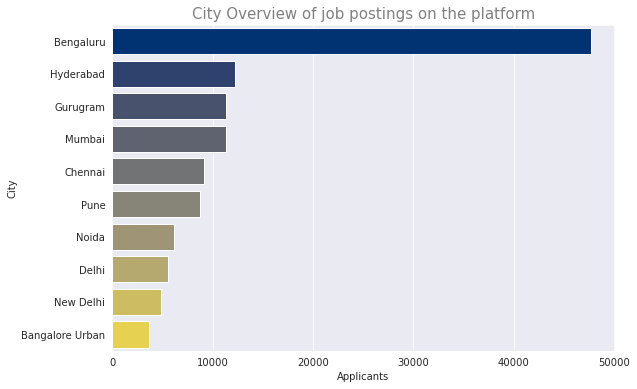

In [35]:
plt.figure(figsize=(9,6))
plt.xlabel('Number of respondendts')
plt.ylabel('City')
plt.title('City Overview of job postings on the platform',fontsize=15, color='grey')
sns.barplot(x=city_data.Applicants,y=city_data.index,saturation=3.5,palette='cividis');

 As we have seen in the pervious data Karnatka has got the highest number of respondents , and now we have clear image on the data that Banglore has the highest number of postings among all the other cities due is the boom place for the startup and various IT companies are growing in the city

### Employee Analysis of Work Type and Level

let's look on the work type distribution and level distribution on how the Employees  is taking on linkdin platform 

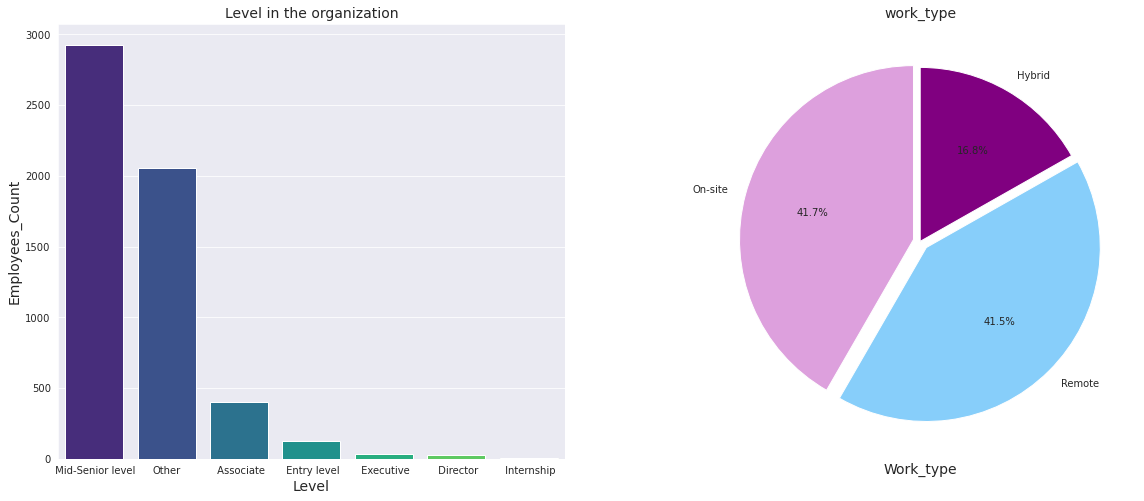

In [36]:
#lets create a function to do this operation 

def Work_data(x):
    
    b = linkdin_data.groupby(x)[['Employees_Count']].count()
    #grouping the data 
    b = b.sort_values('Employees_Count',ascending=False)
    return b
    #returns the data 

Level_data = Work_data('Level')
Work_level_type_data =Work_data('Work_Type')


#let's visualize this data in the form of plots 

fig , axes = plt.subplots(1,2 , figsize = (20,8))                          

axes[0].set_title("Level in the organization",fontsize=14)
axes[0].set_xlabel("Level",fontsize=14)
axes[0].set_ylabel("Employee_count",fontsize=14)
sns.barplot(x=Level_data.index ,y= Level_data.Employees_Count,ax=axes[0],palette='viridis',saturation=5.5);

#used pie and bar to visualize the data

axes[1].set_title("work_type",fontsize=14)
axes[1].set_xlabel("Work_type",fontsize=14)
axes[1].pie(x=Work_level_type_data.Employees_Count,labels=Work_level_type_data.index, autopct ='%.1f%%', startangle = 90, 
        explode=[0.040,0.050,0.0] ,colors=['plum','lightskyblue','purple']);




**Level:**

The data presents a summary of employee counts across various job levels within the organization. "Mid-Senior level" has the highest representation  "Internship" positions have the smallest representation . This distribution offers insights into the company's workforce composition and the relative presence of experienced professionals, junior staff, and high-ranking executives.

From the above we can figue out that most of the employes are sharing an  equal propotion on ( on-site and hybrid) and 16.8% is occupied by hybrid

## Now let's take a look on the industry and the Designation 
on how the  job postings is taking on the linkdin platform on how diffrent respondednts and employees are intrested in diffrent designation and industry they are intrested in so we can do this operation by using subplots in the matplotlib and seaborn  

From this we can have an idea on which industry and designation employee and respondents are intrested in 

**so Let's dive in**


In [158]:
#since there are 103 industry we can just take 10 top industries 

industry_df = linkdin_data.groupby('Industry')[['Applicants']].sum() #groups the data of the industry
industry_df = industry_df.sort_values('Applicants',ascending=False).head(10) #sorts the data in the descending order
industry_df

desgination_df = linkdin_data.groupby('Designation')[['Applicants']].sum() #groups the data of the industry
desgination_df = desgination_df.sort_values('Applicants',ascending=False).head(10) #sorts the data in the descending order
desgination_df

,Applicants
Designation,
Data Analyst,37731
Business Analyst,16282
Analyst,8202
Other Developer,5477
Other,4427
Python Developer,3783
SQL Developer,3645
Java Developer,3135
Salesforce Developer,3101


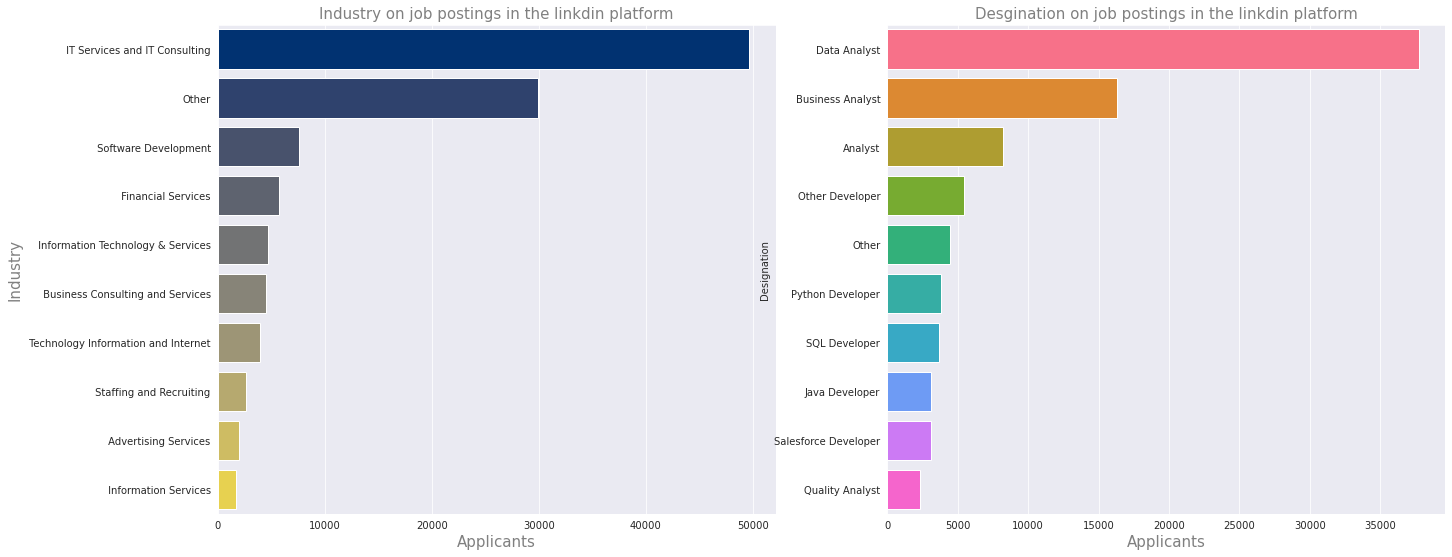

In [38]:
#using the subplots to visualize the data 
fig, axes = plt.subplots(1, 2, figsize=(22,9))

axes[0].set_title('Industry on job postings in the linkdin platform', fontsize=15, color='grey')
axes[0].set_xlabel('Response', fontsize=15, color='grey')
axes[0].set_ylabel('Industry', fontsize=15, color='grey')
sns.barplot(x=industry_df.Applicants,y=industry_df.index,ax=axes[0],
              palette='cividis',saturation=3.5);


axes[1].set_title('Desgination on job postings in the linkdin platform', fontsize=15, color='grey')
axes[1].set_xlabel('Response', fontsize=15, color='grey')
sns.barplot(x=desgination_df.Applicants,y=desgination_df.index,ax=axes[1],
              palette='husl',saturation=3.5);



##### From the above data we can figure out some of the intresting insights

Industry : when we look at the data we are able to figure out that most of the respondednts are intrested in the IT services and IT consulting and followed by other industry by the employees as we saw earlier banglore had highest respondents from this it shows that most of the employees are intrested in joining the  IT services and IT consulting

Desgination : from the data we can figure out that most of the respondednts are intrested in Data Analyst role and followed by other analyst roles , The reason can be Data science is now a booming carrier and that can be the reason why most of the employees are intrested in applying for data analyst and other analyst roles 

### Company 

In [39]:
company_df = linkdin_data.groupby('Company_Name')[['Applicants']].sum()
company_df = company_df.sort_values('Applicants',ascending=False).head(25)
company_df


,Applicants
Company_Name,
Tata Consultancy Services,12709
Uplers,5742
Virtusa,2944
Ltimindtree,2239
Tech Mahindra,1732
Wipro,1647
Epsilon India,1167
Crossover,1137
Genpact,1104


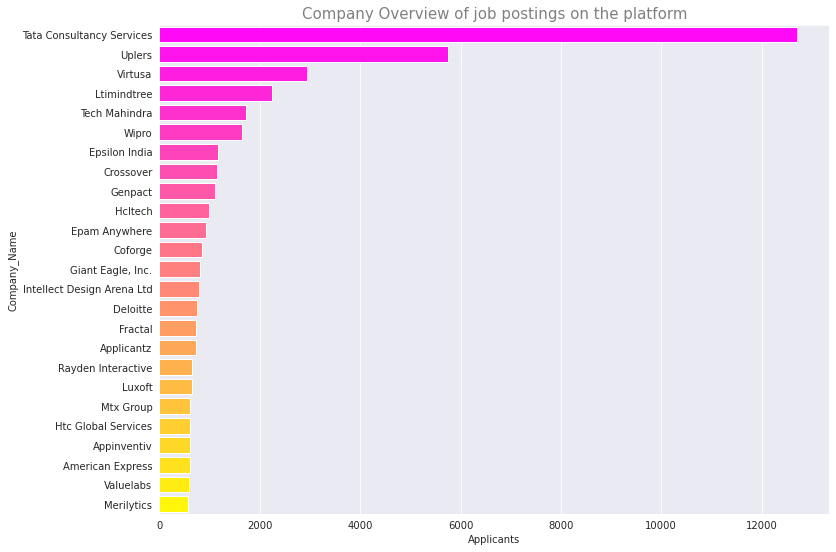

In [40]:
plt.figure(figsize=(12,9))
plt.xlabel('Respondnts')
plt.ylabel('Company_name')
plt.title('Company Overview of job postings on the platform',fontsize=15, color='grey')
sns.barplot(x=company_df.Applicants,y=company_df.index,saturation=3.5,palette='spring');


##### From the above data we can figure out that most of the employees are appling to Tata consultancy services (TCS)which is an Indian multinational IT services and consulting company.  and TCS is getting highest number of application from linkdin followed by Uplers

# Asking and Answering Questions

Till now we have got an overview on the various segments of areas such as (industry , Desgination, involvement , Company , state, city etc) on employees are applying for jobs in these areas, and in what segment the employees are intrested in applying 
Let's  try to answer them using data frame operations and visualizations.

### So now we can start to answer the business questions to get more insights and intresting answers from the data 
 So let's dive in 

Before let's save and upload our work in jovian...... 

In [36]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "samkumarr24/linkedin-job-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/samkumarr24/linkedin-job-analysis


'https://jovian.com/samkumarr24/linkedin-job-analysis'

## What is the average number of applicants per job listing?


In [41]:
avg = linkdin_data.Applicants.mean()
avg_applicants = abs(round(avg))
print("The average number of applicants per job listing in linkdin is ",avg_applicants)

The average number of applicants per job listing in linkdin is  24


## Top 10 companies have the highest number of LinkedIn followers?

In [42]:
linkdin_followers = linkdin_data.groupby('Company_Name')[['Followers']].sum()
linkdin_followers = linkdin_followers.sort_values('Followers',ascending=False).head(10)
linkdin_followers


,Followers
Company_Name,
Tata Consultancy Services,2432811038
Epam Anywhere,983505591
Crossover,337588968
Uplers,194458770
Ltimindtree,51069980
Virtusa,45841837
Hcltech,41505120
Genpact,28797236
Tech Mahindra,28481335


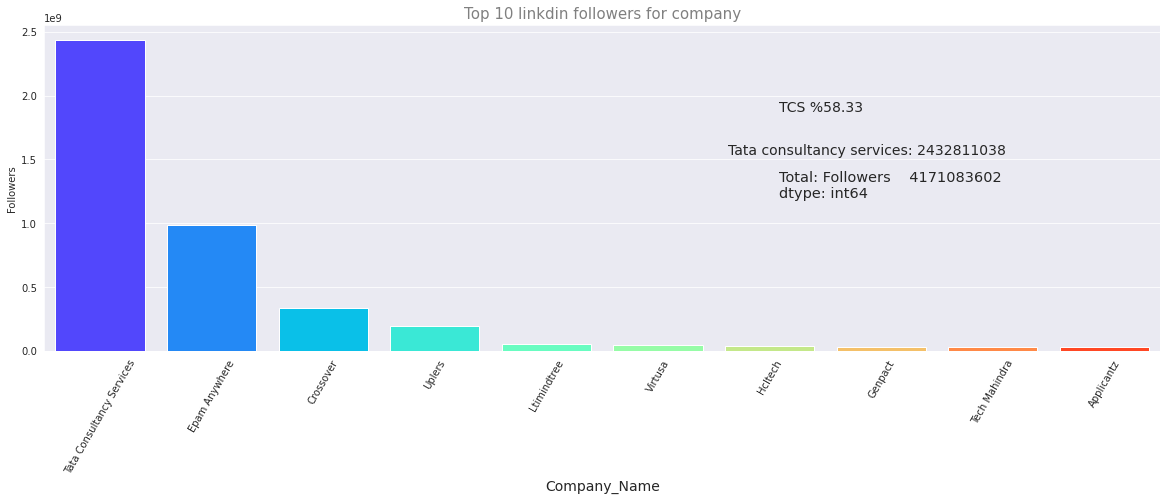

In [43]:
plt.figure(figsize=(20,6))
plt.xlabel('Company_name',fontsize=14)
plt.ylabel('followers')
plt.title('Top 10 linkdin followers for company',fontsize=15, color='grey')

sns.barplot(y=linkdin_followers.Followers,x=linkdin_followers.index,saturation=3.5,palette='rainbow');

plt.figtext(0.635, 0.48, "Total: " + str(linkdin_followers.sum()), fontsize = 14.5)
plt.figtext(0.600, 0.58, "Tata consultancy services: " + str(linkdin_followers["Followers"][0]), fontsize = 14)
plt.figtext(0.635, 0.68, "TCS %" +str(round(linkdin_followers["Followers"][0] / linkdin_followers.Followers.sum() * 100,2)),fontsize = 14); 
plt.xticks(rotation = 60);

From the above data we can figure out that the highest number of following in linkdin is for Tata consultancy services and followed by Epam anywhere....... 

#### Tata consultancy services is the highest followed in linkdin with 58.33%

## Top 20 Designation have the highest number of LinkedIn followers?

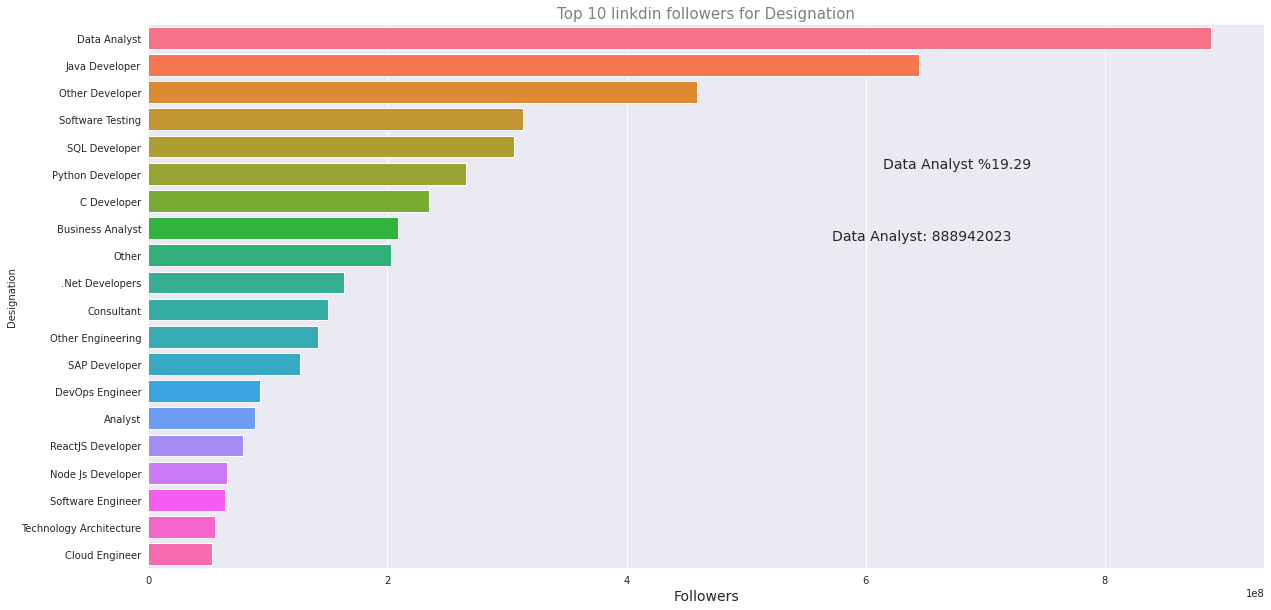

In [44]:
desgination_linkdin_followers = linkdin_data.groupby('Designation')[['Followers']].sum()
desgination_linkdin_followers = desgination_linkdin_followers.sort_values('Followers',ascending=False).head(20)
desgination_linkdin_followers

plt.figure(figsize=(20,10))
plt.xlabel('Company_name',fontsize=14)
plt.ylabel('followers')
plt.title('Top 10 linkdin followers for Designation',fontsize=15, color='grey')

sns.barplot(x=desgination_linkdin_followers.Followers,y=desgination_linkdin_followers.index,saturation=3.5,palette='husl');

plt.figtext(0.600, 0.58, "Data Analyst: " + str(desgination_linkdin_followers["Followers"][0]), fontsize = 14)
plt.figtext(0.635, 0.68, "Data Analyst %" +str(round(desgination_linkdin_followers["Followers"][0] 
                                            /desgination_linkdin_followers.Followers.sum() * 100,2)),fontsize = 14); 



#### Highest number of linkdin followers for the desgination role is for data analyst and followed by java developer , the since data analyst role is on demand job in today's era and that could be the reason for the more number of followers

## What is the distribution of the number of applicants across different job postings.

let's plot this using a histogram for the better understanding of the Data..

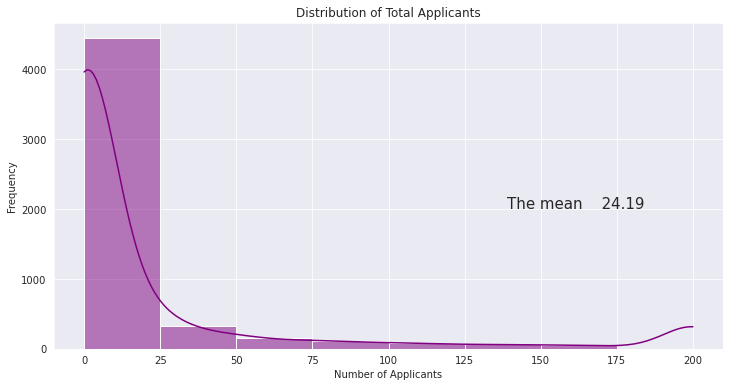

In [159]:
plt.figure(figsize=(12,6))
sns.histplot(x=linkdin_data['Applicants'], bins=np.arange(0,200,25) ,kde=True,color='purple')
plt.xlabel('Number of Applicants')
plt.ylabel('Frequency')
plt.title('Distribution of Total Applicants')

#we can .mean to plot this to get the avg value

plt.figtext(0.650,0.45,"The " + round(linkdin_data.describe().Applicants[['mean']],2).to_string(),fontsize=15)

plt.show()

From the above data it shows that most of the job postings are from range 0-20 , so we can assume that most applicants the industry or company is receiving around 0-20 The avg is 24.14 and there is slightly higher growth in 175 - 200

## Which industries offer the most remote job opportunities?


A "remote job" refers to a type of employment where the employee is not required to work from a physical office location but can instead work from a location outside the company's premises, typically from their own home or any other place of their choosing.

For this let's filter our data just to [Work_Type = Remote]

In [46]:
remote_df = linkdin_data[linkdin_data['Work_Type'] == "Remote"]
remote_df = remote_df.groupby('Industry').size().reset_index(name="remote_job_count")
remote_df = remote_df.sort_values("remote_job_count",ascending=False).head(10)


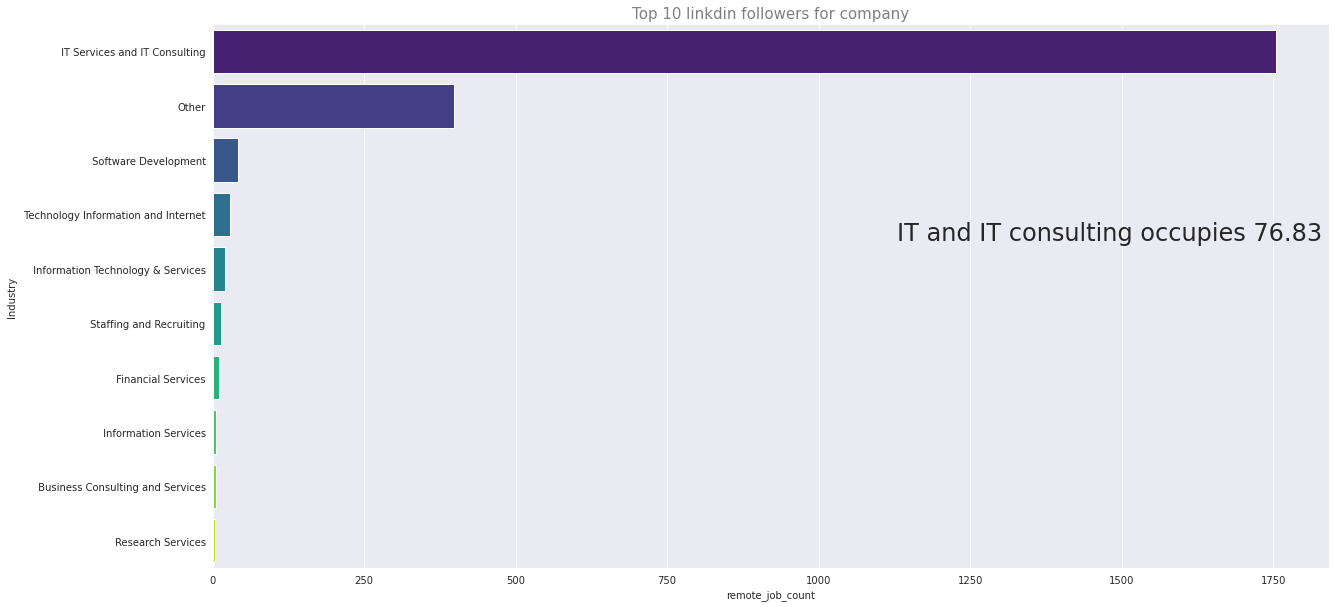

In [47]:
remote_df = linkdin_data[linkdin_data['Work_Type'] == "Remote"]
remote_df = remote_df.groupby('Industry').size().reset_index(name="remote_job_count")
remote_df = remote_df.sort_values("remote_job_count",ascending=False).head(10)


plt.figure(figsize=(20,10))
plt.xlabel('Company_name')
plt.ylabel('followers')
plt.title('Top 10 linkdin followers for company',fontsize=15, color='grey')
sns.barplot(x=remote_df.remote_job_count,y=remote_df.Industry,saturation=3.5,palette='viridis');
plt.figtext(0.600,0.58,"IT and IT consulting occupies "+str(round(remote_df.remote_job_count.max()/remote_df.
                                                    remote_job_count.sum() *100,2)),fontsize=24); 



 


From the above data are the top 10 followers on linkdin for the company above the data , we are able to figure out that most and the maximum followers are for IT services and IT consulting services due to it's high demand and growth in the industry

**IT and IT consulting services occupies almost 76.83%**

## What is the average number of applicants for each industry and job level combination?

we can get an overview on avg application applied on industry and job level by the employees , 
so we can use (pd.mean()) method to find the average and then visualize the data

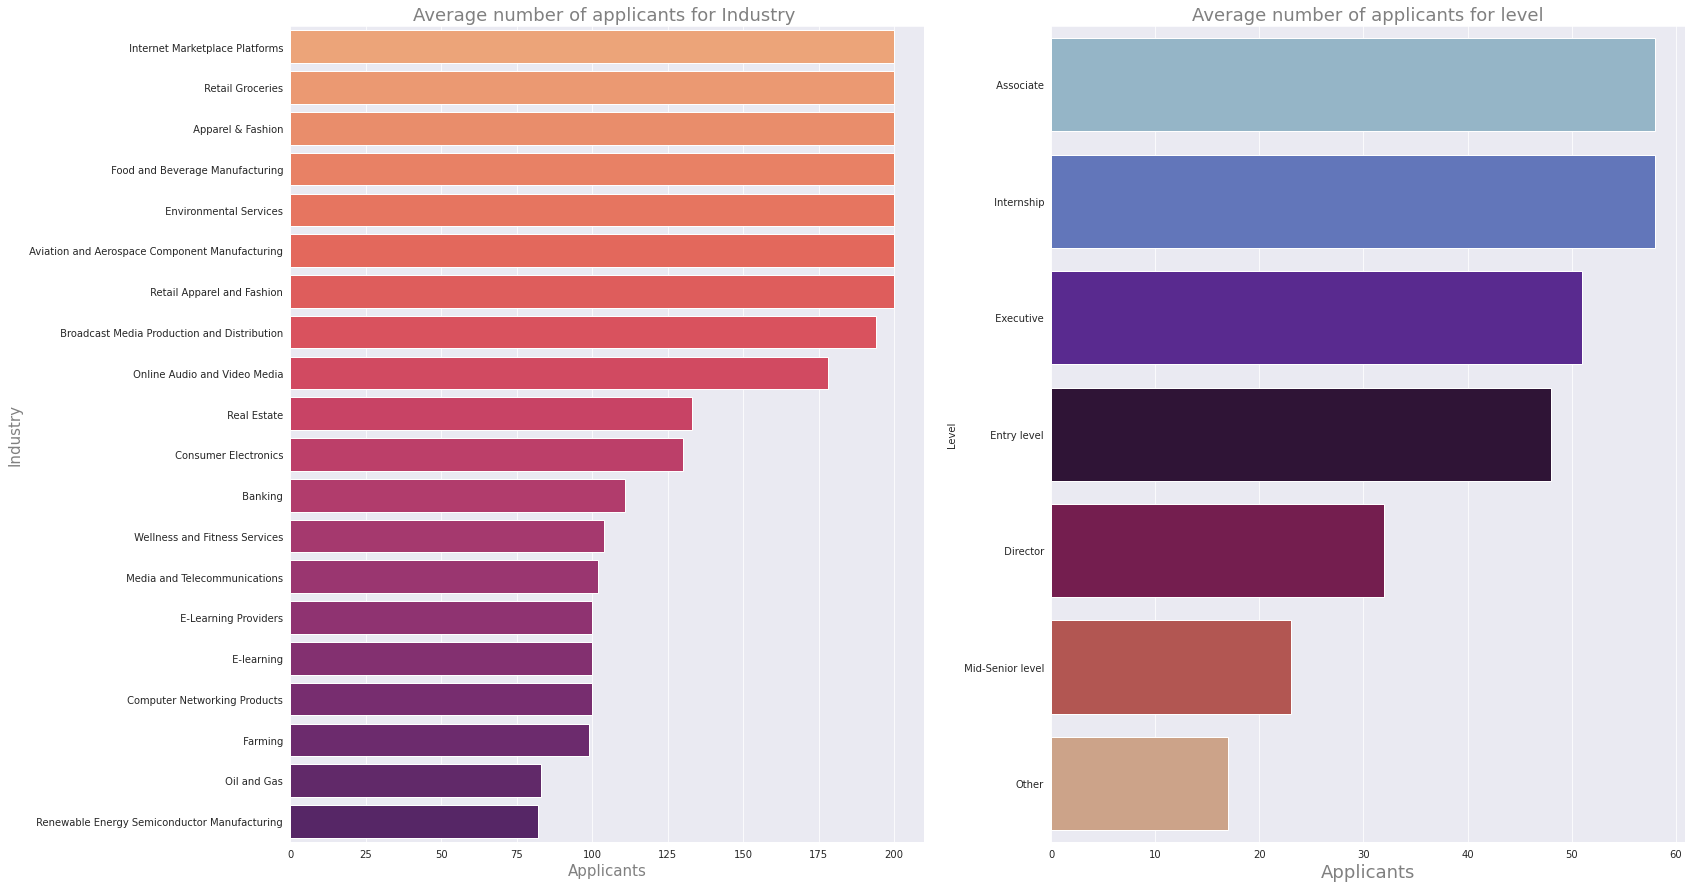

In [48]:
industry_avg = linkdin_data.groupby('Industry')[['Applicants']].mean()
industry_avg = abs(round(industry_avg)).sort_values('Applicants',ascending=False).head(20)
industry_avg

job_level_avg = linkdin_data.groupby('Level')[['Applicants']].mean()
job_level_avg  = abs(round(job_level_avg)).sort_values('Applicants',ascending=False).head(20)
job_level_avg 

fig, axes = plt.subplots(1, 2, figsize=(25,15))

# we can use subplots to visualize this data 

axes[0].set_title('Average number of applicants for Industry ', fontsize=18, color='grey')
axes[0].set_xlabel('Response', fontsize=15, color='grey')
axes[0].set_ylabel('Industry', fontsize=15, color='grey')
sns.barplot(x=industry_avg.Applicants,y=industry_avg.index,ax=axes[0],
              palette='flare',saturation=3.5);


axes[1].set_title('Average number of applicants for level', fontsize=18, color='grey')
axes[1].set_xlabel('Response', fontsize=18, color='grey')
sns.barplot(x=job_level_avg.Applicants,y=job_level_avg.index,ax=axes[1],
              palette='twilight',saturation=3.5);





**From the above data :**

**Industry :**
    we are to figure out that internet market platforms , retial grocries , apperance , food and beverage , enviromental services are getting equal amount of applicants and followed by real estate, online audio and media etc from are the average number of applicants are applying to linkdin

**Level:**
    Assosciate and internship are sharing equal amount of average applicants and followed by executive are the avg applicants are applying

## Which cities and states have the highest competition for data analyst and other Analyst roles?

since many employees are intrested in applying for Data analyst and other analyst roles , so we can dig in more and bring out some intresting insights from the data  

since we are looking at the highest competition let's limit it only 3 . 

To perform this operation we can use the (str.contains.) method what it does is it just filter's he data which contains the "Analyst" roles

In [49]:
#les's filter out the data containing Analyst roles

filtered_analyst_df = linkdin_data[linkdin_data['Designation'].str.contains('Analyst',case = False) ]

#this is the filtered data which contains only analyst roles
filtered_analyst_df.sample(5)

,Job_Id,Designation,Company_Name,Work_Type,Involvement,Employees_Count,Applicants,Followers,Industry,Level,City,State
3395,3461691937,Business Analyst,Techs To Suit Inc,Remote,Full-time,51,0,42718,Human Resources,Mid-Senior level,Bengaluru,Karnataka
5120,3461037102,Business Analyst,Infiraise,On-site,Full-time,11,20,5580,Other,Other,Ahmedabad,Gujarat
4352,3468043427,Data Analyst,Hcltech,Hybrid,Full-time,10001,68,982115,IT Services and IT Consulting,Mid-Senior level,Bangalore Urban,Karnataka
5188,3473702629,Quality Analyst,Tjx Global It - India,On-site,Full-time,51,0,7122,Technology Information and Internet,Associate,Hyderabad,Telangana
3200,3466653518,Data Analyst,Fractal,On-site,Full-time,1001,0,982115,Business Consulting and Services,Mid-Senior level,Bangalore Urban,Karnataka


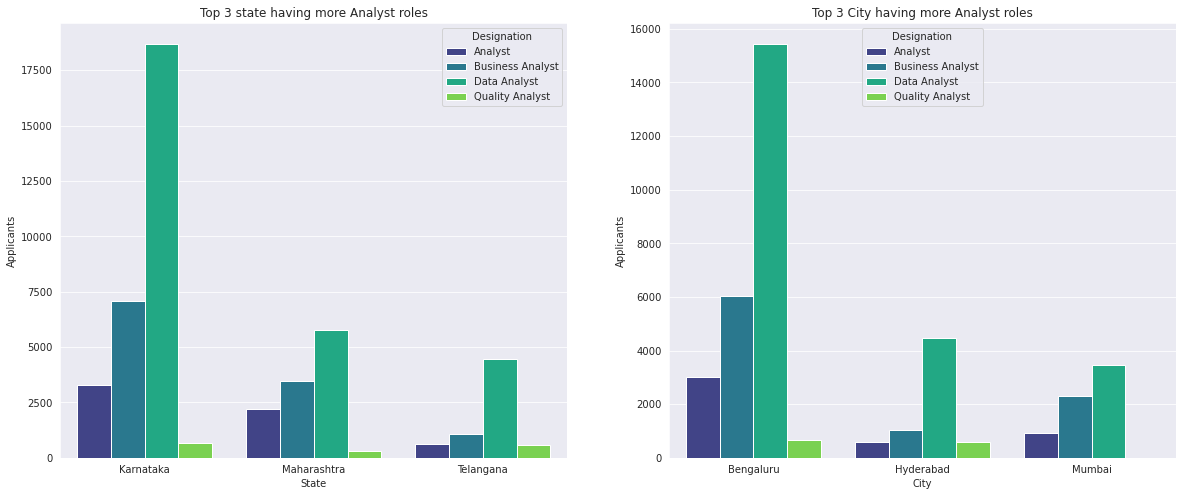

In [50]:

state_analyst_df = filtered_analyst_df.groupby(['State', 'Designation'])[['Applicants']].sum()
state_analyst_df.reset_index(inplace=True)

# Group by 'State' and sum the 'Applicants' column again to get the total applicants for each state
# Get the top 3 states with the highest total number of applicants for 'Analyst' roles
# Filter the state_analyst_df to only include the rows for the top 3 states


state_analyst_total_applicants = state_analyst_df.groupby('State')['Applicants'].sum()
top_3_states = state_analyst_total_applicants.nlargest(3)
top_3_states_analyst_df = state_analyst_df[state_analyst_df['State'].isin(top_3_states.index)]
top_3_states_analyst_df


city_analyst_df = filtered_analyst_df.groupby(['City', 'Designation'])[['Applicants']].sum()
city_analyst_df.reset_index(inplace=True)

city_analyst_total_applicants = city_analyst_df.groupby('City')['Applicants'].sum()
top_3_city = city_analyst_total_applicants.nlargest(3)
top_3_city_analyst_df = city_analyst_df[city_analyst_df['City'].isin(top_3_city.index)]

top_3_city_analyst_df


#let's visualize this data in the form of plots 

fig , axes = plt.subplots(1,2 , figsize = (20,8))                          

axes[0].set_title("Top 3 state having more Analyst roles")
axes[0].set_xlabel("State")
axes[0].set_ylabel("Applicants")
sns.barplot(x=top_3_states_analyst_df.State ,y=top_3_states_analyst_df.Applicants,hue=top_3_states_analyst_df.
            Designation,ax=axes[0],palette='viridis',saturation=5.5);




axes[1].set_title("Top 3 City having more Analyst roles")
axes[1].set_xlabel("city")
axes[1].set_ylabel("Applicants")
sns.barplot(x=top_3_city_analyst_df.City ,y=top_3_city_analyst_df.Applicants,hue=top_3_city_analyst_df.
            Designation,ax=axes[1],palette='viridis',saturation=5.5);




* From the above data we are able to see That :
    
**when we look at the state Karnataka , Maharashtra , Telengana are the top 3 cities with highest Analyst roles and when we look at the data Karnataka have the highest%% compared to the other states and followed by Business analyst role**

**It is not suprising  Bengaluru  , Hyderabad , Mumbai  are the top 3 cities with highest Analyst roles and when we look at the data It is not suprising Bengaluru  have the highest%% compared to the other two cities**

* Data Analyst

##### A Data Analyst is a professional who collects, processes, and analyzes large datasets to extract meaningful insights and support decision-making. They use statistical methods, programming languages, and data visualization tools to identify trends, patterns, and correlations within the data, providing valuable information to businesses and organizations. Data analysts play a crucial role in turning raw data into actionable knowledge, helping businesses make informed strategic choices and optimize their operations.

## Since Desgination includes "Internship" we can look at Which (comany state city and industry) getting more internships


An internship is a short-term work opportunity provided to students or recent graduates to gain practical experience in a specific field or industry. Internships typically last for a few months and can be either paid or unpaid. 

**They offer valuable hands-on training, exposure to real-world challenges, and a chance to apply theoretical knowledge in a professional setting, making them an essential stepping stone for building a successful career.**

Text(0, 0.5, 'State')

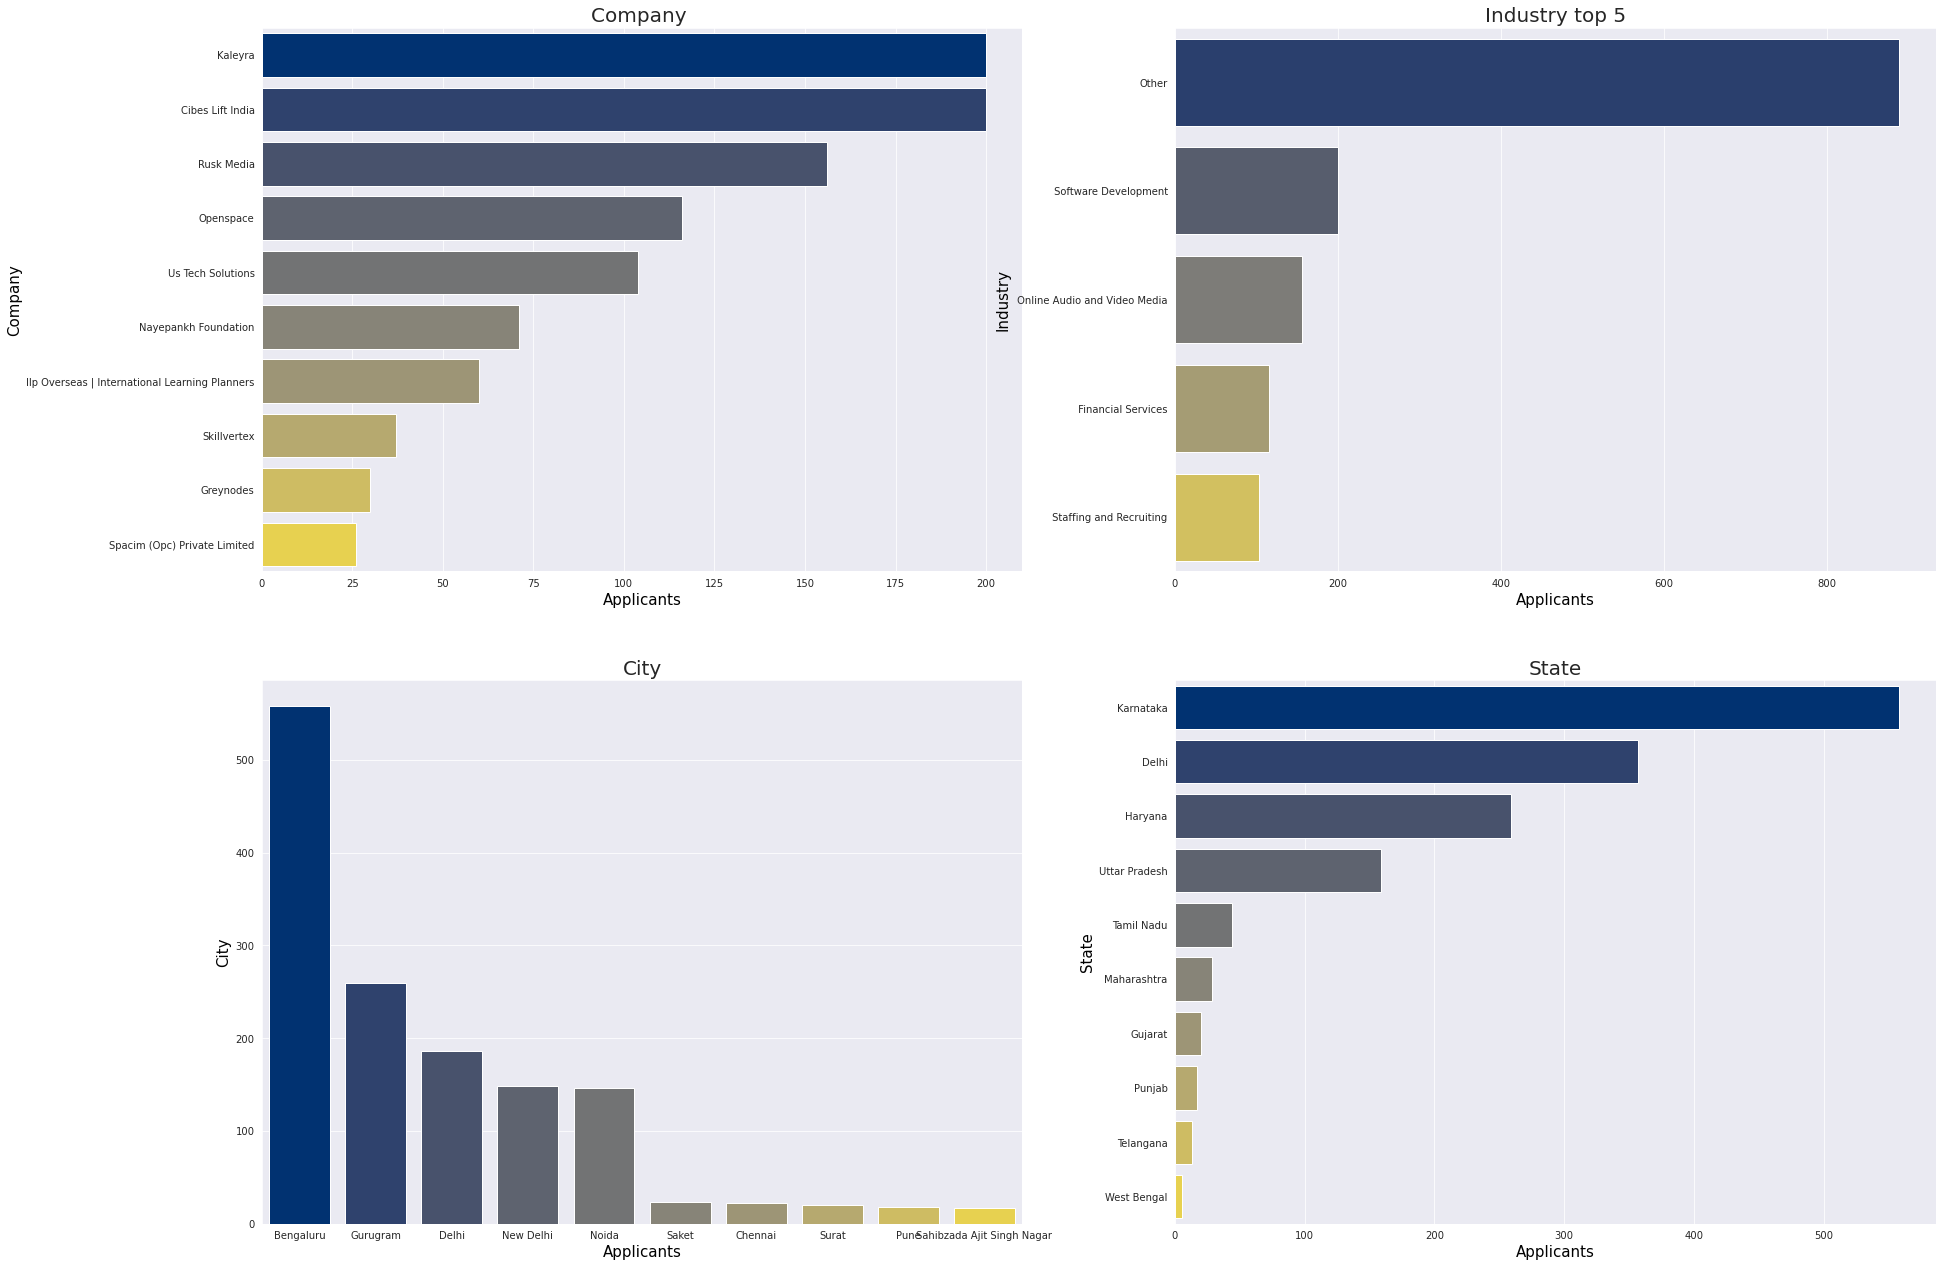

In [52]:
# let's create a function for this 

def Intenship_data(x):
    
    a = linkdin_data[linkdin_data['Designation'] == 'Internships']
    #filters the data containing intenship
    a = a.groupby(x)[['Applicants']].sum()
    #groups the data 
    a = a.sort_values('Applicants',ascending=False).head(10)
    #sorts the data and we can look at the top 10 
    return a
    #returns the data 

company_intenship_df = Intenship_data(linkdin_data.Company_Name)
industry_intenship_df = Intenship_data(linkdin_data.Industry).head(5)
city_intenship_df = Intenship_data(linkdin_data.City)
state_intenship_df = Intenship_data(linkdin_data.State)
# this is the data of the fiffrent sectors on providing intenship 

# lets plot this data with the subplots

fig, axes = plt.subplots(2, 2, figsize=(30,22))


axes[0,0].set_title("Company ",fontsize = 20);
sns.barplot(y=company_intenship_df.index,x=company_intenship_df.Applicants,ax=axes[0][0],palette='cividis',saturation=3.5);
axes[0,0].set_xlabel('Applicants', fontsize=15, color='black')
axes[0,0].set_ylabel('Company', fontsize=15, color='black')


axes[0,1].set_title("Industry top 5",fontsize = 20);
sns.barplot(y=industry_intenship_df.index,x=industry_intenship_df.Applicants,ax=axes[0][1],palette='cividis',saturation=3.5);
axes[0,1].set_xlabel('Applicants', fontsize=15, color='black')
axes[0,1].set_ylabel('Industry', fontsize=15, color='black')


axes[1,0].set_title("City",fontsize = 20);
sns.barplot(x=city_intenship_df.index,y=city_intenship_df.Applicants,ax=axes[1][0],palette='cividis',saturation=3.5);
axes[1,0].set_xlabel('Applicants', fontsize=15, color='black')
axes[1,0].set_ylabel('City', fontsize=15, color='black')

axes[1,1].set_title("State",fontsize = 20);
sns.barplot(y=state_intenship_df.index,x=state_intenship_df.Applicants,ax=axes[1][1],palette='cividis',saturation=3.5);
axes[1,1].set_xlabel('Applicants', fontsize=15, color='black')
axes[1,1].set_ylabel('State', fontsize=15, color='black')


 * Kaleyra and Cibes Lift India stand out each attracting 20% of the total applicants. Rusk Media and Openspace follow closely, with 15.6% and 11.6% of the applicants, respectively. The rest of the companies have a lower share of applicants, with Nayepankh Foundation at 7.1% and others below 7%. This data suggests that a significant portion of the applicants prefer Kaleyra and Cibes Lift India, while other companies have relatively smaller shares of interest.

* when we look at the industry "other industries " attracts the majority of applicants, accounting for approximately 62.2% of the total. Software Development stands out as the second most popular choice, with approximately 14% of the applicants. Online Audio and Video Media, Financial Services, and Staffing and Recruiting have 10.9%, 8.1%, and 7.3% of the applicants, respectively. These percentages indicate that a significant portion of applicants are interested in industries falling under the "other" category, while Software Development is the next preferred choice.



* Bengaluru has the highest number of applicants  constituting approximately 40.26% of the total. Gurugram and Delhi follow with  (18.68%) and  (13.41%) applicants, respectively. Other cities have fewer applicants, each comprising less than 2% of the total.


* Karnataka has the highest number comprising approximately 38.19% of the total. Delhi follows with  (24.43%), and Haryana with 259  (17.73%). Other states have a lower number of applicants, each constituting less than 5% of the total.

## What is the distribution on diffrent Work_type on the level's of the employment (Employee_count)

using the heat map to visualize the data 

In [54]:
#  Create a pivot table with the desired rows and columns
work_pivot_df = pd.pivot_table(linkdin_data, 
                          index='Level', 
                          columns='Work_Type', 
                          values='Applicants', 
                           aggfunc= lambda x: (x.sum() / linkdin_data['Applicants'].sum()) * 100,
                          fill_value=0)
#using the lambda function to get the percentages 

#  Reorder the columns to match the desired order
work_pivot_df = work_pivot_df[['Hybrid', 'On-site', 'Remote']]

work_pivot_df


Work_Type,Hybrid,On-site,Remote
Level,,,
Associate,4.638567,8.967748,3.539764
Director,0.201064,0.330160,0.034871
Entry level,1.063932,2.406832,1.073578
Executive,0.471870,0.817611,0.002968
Internship,0.000000,0.151354,0.148387
Mid-Senior level,17.069660,20.986326,11.918417
Other,3.599861,15.415891,7.161140


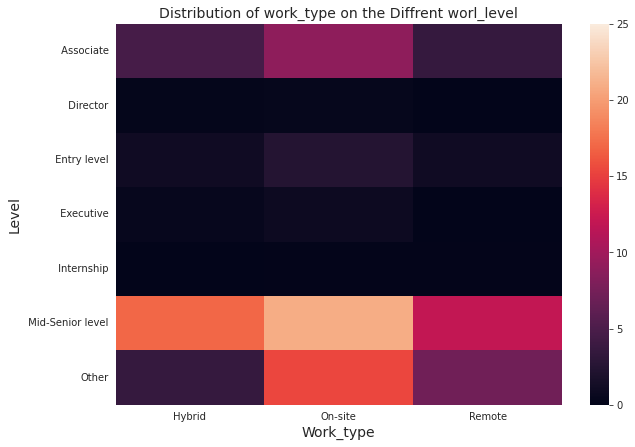

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(data=work_pivot_df,vmax=25,vmin=0, cbar=True);
plt.xlabel("Work_type",fontsize=14)
plt.ylabel("Level",fontsize=14)
plt.title("Distribution of work_type on the Diffrent worl_level",fontsize=14);

From the above heat_map data we are able to see that 

* The majority of job listings are for "Mid-Senior level" positions, across all work types (Hybrid, On-site, and Remote).

* "Hybrid" work type is more common for "Mid-Senior level" positions, while "On-site" work type is prevalent for "Associate" and "Entry level" positions.

* "Mid-Senior level" positions have a significantly higher number of total applicants compared to other levels.

* "Remote" work type is less common across all job levels compared to "Hybrid" and "On-site" work types.

* other Level in the organization is also having more number on_site and remote areas 


In [64]:
linkdin_data.State.unique()

array(['Delhi', 'Karnataka', 'Haryana', 'Uttar Pradesh', 'Telangana',
       'Tamil Nadu', 'West Bengal', 'Maharashtra', 'Kerala', 'Gujarat',
       'Madhya Pradesh', 'Rajasthan', 'Chandigarh', 'Uttarakhand',
       'Punjab', 'Bihar', 'Andhra Pradesh', 'Puducherry', 'Goa', 'Odisha',
       'Jharkhand', 'Jammu and Kashmir', 'Himachal Pradesh', 'Assam',
       'Chhattisgarh'], dtype=object)

## What is the distribution of region in applying for job's in linkdin
##### (North_india , South_india , East_india , West_india,)

##### Let's create a dictionary

In [58]:

#Now we can create a dictionary which contains the diffrent state representing the region of india
region_data = {
    'State': ['Delhi', 'Karnataka', 'Haryana', 'Uttar Pradesh', 'Telangana',
              'Tamil Nadu', 'West Bengal', 'Maharashtra', 'Kerala', 'Gujarat', 'Madhya Pradesh',
              'Rajasthan', 'Chandigarh', 'Uttarakhand', 'Punjab', 'Bihar', 'Andhra Pradesh',
              'Puducherry', 'Goa', 'Odisha', 'Jharkhand', 'Jammu and Kashmir',
              'Himachal Pradesh', 'Assam', 'Chhattisgarh'],
    
    'Region': ['North India', 'South India', 'North India', 'North India', 'South India',
               'South India', 'East India', 'West India', 'South India', 'West India', 'North India',
               'North India', 'North India', 'North India', 'North India', 'North India', 'South India',
               'South India', 'West India', 'East India', 'North India', 'North India',
               'North India', 'East India', 'North India']
}

# converting this dictionary to a pandas data frame named Region_df
Region_df = pd.DataFrame(region_data)

In [59]:
Region_df.sample(5)

,State,Region
16,Andhra Pradesh,South India
4,Telangana,South India
10,Madhya Pradesh,North India
13,Uttarakhand,North India
17,Puducherry,South India


Now let's use a new function (pd.merge function) to combine the region_df to linkdin_data : what it does is we are going to join the data using the column name State_name to combine the data

##### pd.merge is a function in the pandas library used for combining two DataFrames based on a common column or index. It allows users to perform various types of joins, such as inner, outer, left, and right, to merge the data efficiently and handle missing values appropriately.


* now let's join the data........

In [67]:
new_region_df = linkdin_data.merge(Region_df,on='State')
new_region_df.sample(5)

,Job_Id,Designation,Company_Name,Work_Type,Involvement,Employees_Count,Applicants,Followers,Industry,Level,City,State,Region
5429,3476187448,ReactJS Developer,Epam Anywhere,Remote,Full-time,1001,1,982115,IT Services and IT Consulting,Mid-Senior level,Patna,Bihar,North India
479,3472505845,Digital Marketing,Pace Stock Broking Services Pvt. Ltd.,On-site,Full-time,201,21,6260,Other,Other,Delhi,Delhi,North India
1273,3462452996,Machine Learning Engineer,Expand Ai,Hybrid,Full-time,1,0,3872,Other,Other,Bengaluru,Karnataka,South India
155,3476289769,Software Testing,Epam Anywhere,Remote,Full-time,1001,0,449877,IT Services and IT Consulting,Mid-Senior level,Delhi,Delhi,North India
123,3471303660,Search Engine Optimization,Uplers,Remote,Full-time,1001,51,982115,IT Services and IT Consulting,Mid-Senior level,New Delhi,Delhi,North India


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


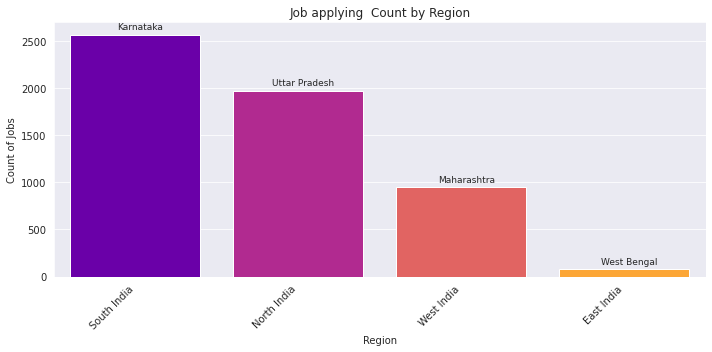

In [68]:
region_count = new_region_df['Region'].value_counts()

# Getting the state with the highest representation for each region
highest_state_per_region = new_region_df.groupby('Region')['State'].apply(lambda x: x.value_counts().idxmax())

# Creating the bar chart
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(region_count.index, region_count.values,palette='plasma',saturation=4.4)
ax.set_xlabel('Region')
ax.set_ylabel('Count of Jobs')
ax.set_title('Job applying  Count by Region')

# Annotating the bar chart with the highest representing state for each region
for i, region in enumerate(region_count.index):
    ax.annotate(highest_state_per_region[region], xy=(i, region_count[i]), xytext=(5, 5),
                textcoords='offset points', ha='center', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* ##### South India has the highest percentage of 52.55% of the total counts, indicating it has the largest presence or activity in the dataset. North India follows closely with 40.36% of the counts, also showing significant representation.


* ##### West India accounts for 19.46% of the total, and East India has the lowest percentage with only 1.73%. 


* ##### This suggests that the data is heavily skewed towards South and North India, while East and West India have relatively smaller contributions in the dataset.

## Top 10  Applied jobs/Desginations in diffrent region

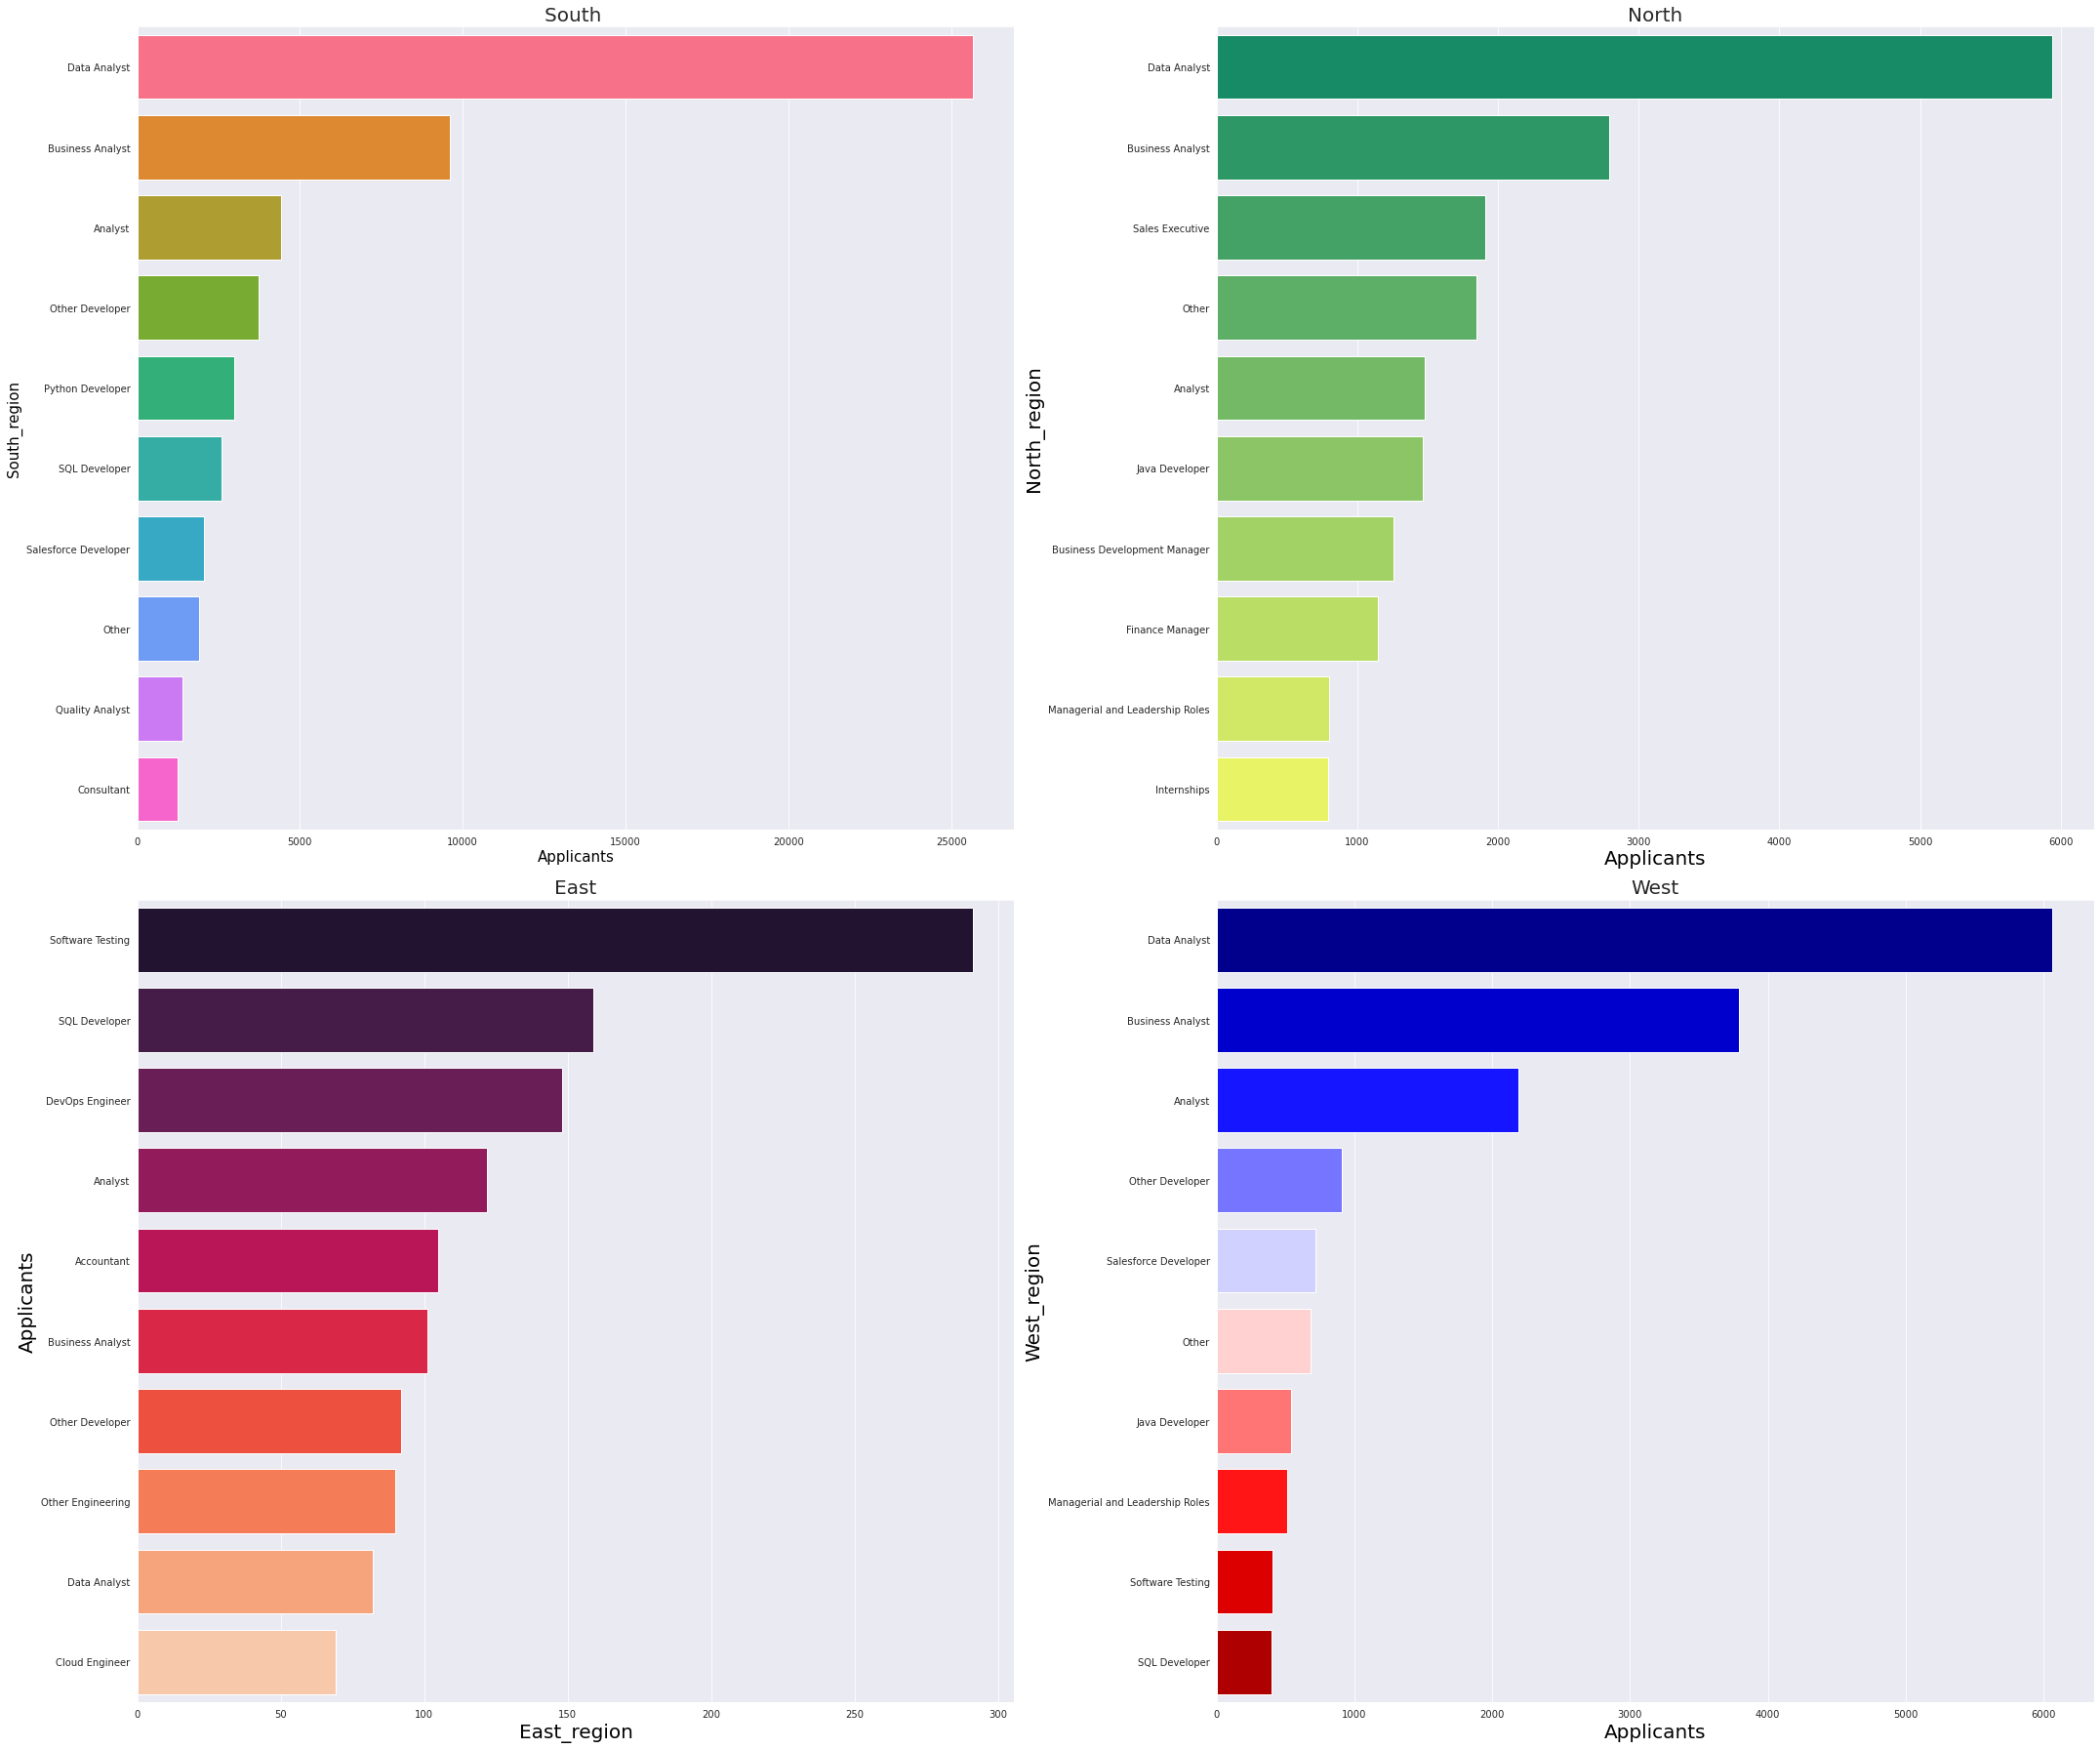

In [144]:
# let's create a function for this 

def region_top_desination(x):
    region_top = new_region_df[new_region_df['Region'] == x] #x refers to the region going to filter
        #filters the data containing region
    region_top_des  = region_top.groupby('Designation')[['Applicants']].sum().sort_values('Applicants',ascending=False).head(10)
    #sorting the values and returning the top 10 jobs
    return region_top_des

South_region_top_degination = region_top_desination('South India') #south region data
north_region_top_degination = region_top_desination('North India') #north region data
east_region_top_degination = region_top_desination('East India') #east region data 
west_region_top_degination = region_top_desination('West India') #west region data 

fig, axes = plt.subplots(2, 2, figsize=(30,25))
#using the subplots to visualize the data 

axes[0,0].set_title("South ",fontsize = 20);
sns.barplot(y=South_region_top_degination.index,x=South_region_top_degination.Applicants,ax=axes[0][0],palette='husl',saturation=3.5);
axes[0,0].set_xlabel('Applicants', fontsize=15, color='black')
axes[0,0].set_ylabel('South_region', fontsize=15, color='black')


axes[0,1].set_title("North",fontsize = 20);
sns.barplot(y=north_region_top_degination.index,x=north_region_top_degination.Applicants,ax=axes[0][1],palette='summer',saturation=3.5);
axes[0,1].set_xlabel('Applicants', fontsize=20, color='black')
axes[0,1].set_ylabel('North_region', fontsize=20, color='black')


axes[1,0].set_title("East",fontsize = 20);
sns.barplot(y=east_region_top_degination.index,x=east_region_top_degination.Applicants,ax=axes[1][0],palette='rocket',saturation=3.5);
axes[1,0].set_ylabel('Applicants', fontsize=20, color='black')
axes[1,0].set_xlabel('East_region', fontsize=20, color='black')

axes[1,1].set_title("West",fontsize = 20);
sns.barplot(y=west_region_top_degination.index,x=west_region_top_degination.Applicants,ax=axes[1][1],palette='seismic',saturation=3.5);
axes[1,1].set_xlabel('Applicants', fontsize=20, color='black')
axes[1,1].set_ylabel('West_region', fontsize=20, color='black')

plt.tight_layout()
plt.show()


* In most of the region data_anayst and other Analyst plays a major role  Applying in link_din but when it comes to East_region
    Software testing have the highest demand and followed by sql developer and in every region most of the applications is taking on the IT and IT consulting services 

* ##### The reason primarily depends mainly on the demand or the booming role in the data_analyst roles and other data_science roles  in the industry and the market , So from this it clearly shows that data Analyst is the most prefred job for applying in the linkdin platform 

## What is the Work_type distribution in diffrent region

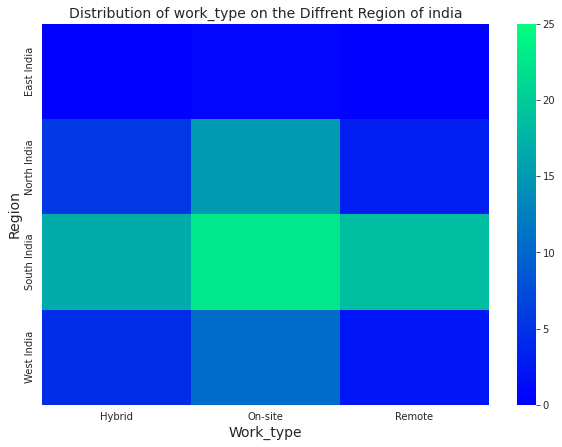

In [157]:
#  Create a pivot table with the desired rows and columns
region_pivot_df = pd.pivot_table(new_region_df, 
                          index='Region', 
                          columns='Work_Type', 
                          values='Applicants', 
                           aggfunc= lambda x: (x.sum() / new_region_df['Employees_Count'].count()) * 100,
                          fill_value=0)
#using the lambda function to get the percentages 

#  Reorder the columns to match the desired order
region_pivot_df = region_pivot_df[['Hybrid', 'On-site', 'Remote']]

plt.figure(figsize=(10,7))
sns.heatmap(data=work_pivot_df,vmax=25,vmin=0, cbar=True,cmap='winter');
plt.xlabel("Work_type",fontsize=14)
plt.ylabel("Region",fontsize=14)
plt.title("Distribution of work_type on the Diffrent Region of india",fontsize=14);


**South India appears to have the highest average values for Remote work type (450.81) compared to On-site (546.68) and Hybrid** (407.97).


**North India has the highest average value for On-site work type (365.54) compared to Remote (72.99) and Hybrid (136.67).**


**East India has the highest average value for On-site work type (17.93) compared to Remote (2.87) and Hybrid (3.91).**

**West India has the highest average value for On-site work type (256.96) compared to Remote (50.95) and Hybrid (105.65).**



The data shows the average values for each work type (Hybrid, On-site, and Remote) in different regions (East India, North India, South India, and West India). South India has the highest average for Remote work type, while North India has the highest average for On-site work type. West India has the highest average for On-site work type among all regions.

## Inferences and Conclusion

##### To start with......

* Most of the job postings are coming from the state of karnataka , probablly the reaoson should be banglore is the city where it is present in karnataka and since is well known metro city , and is a start-up hub place in th country and many IT companies and start-up place


**Banglore has the highest number of postings among all the other cities**

* "Mid-Senior level" has the highest representation  
* This distribution offers insights into the company's workforce composition and the relative presence of experienced professionals, junior staff, and high-ranking executives.

**Tata consultancy services (TCS)which is an Indian multinational IT services and consulting company.  and TCS is getting highest number of application from linkdin**

* The average number of applicants per job listing in linkdin is  24

**Tata consultancy services is the highest followed in linkdin with 58.33%**

**Highest number of linkdin followers for the desgination role is for data analyst and followed by java developer**

* Most applicants the industry or company is receiving around 0-20 The avg is 24.14 and there is slightly higher growth in 175 - 200

**The maximum followers are for IT services and IT consulting services due to it's high demand and growth in the industry
IT and IT consulting services occupies almost 76.83%**

**Karnataka , Maharashtra , Telengana are the top 3 cities with highest Analyst roles and when we look at the data Karnataka have the highest%% compared to the other states and followed by Business analyst role**

* Bengaluru  , Hyderabad , Mumbai  are the top 3 cities with highest Analyst roles and when we look at the data It is not suprising Bengaluru  have the highest%% compared to the other two cities**

**South India has the highest percentage of 52.55% of the total counts, indicating it has the largest presence or activity in the dataset. North India follows closely with 40.36% of the counts, also showing significant representation.**

* West India accounts for 19.46% of the total, and East India has the lowest percentage with only 1.73%.

**In most of the region data_anayst and other Analyst plays a major role  Applying in link_din but when it comes to East_region
  Software testing have the highest demand   it clearly shows that data Analyst is the most prefred job for applying in the linkdin platform**

* South India appears to have the highest average values for Remote work type (450.81) compared to On-site (546.68) and Hybrid** (407.97).
* North India has the highest average value for On-site work type (365.54) compared to Remote (72.99) and Hybrid (136.67).**



## References and Future Work

**Check the following resources for further references and to learn more about this.......**

- W3 schools: https://www.w3schools.com/python/pandas/default.asp
- Pandas : https://pandas.pydata.org/docs/user_guide/index.html
- Geeks for Geeks for Matplotlib: https://www.geeksforgeeks.org/matplotlib-tutorial/
- Seaborn : https://seaborn.pydata.org/tutorial.html





* **Project reffered** : https://jovian.com/ash007online/general-elections-analysis/v/237#C0
             


             
 
 
 
 
 
      
**I liked to jovian and team for providing this hands-project and this project helped me to gain a lot of skills on (Pandas , Matplotlib , seaborn , Numpy) through this Project and the course, and this has helped me to upskill my Data Analysis skills and also recommend to take up this course for the people who are interested in Exploring and upskilling Their Data Analysis Skills**

**Course_link** : https://jovian.com/
              
              

                                                       🙂👍📈

## Thank you....... 👍🙂

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>